# 順序と組合せに関係した問題（トラック配車計画の最適化）

・組み合わせ問題と順序に関する問題を同時に扱うための解法

DEAP
https://deap.readthedocs.io/en/master/

In [1]:
from deap import base, creator, tools, algorithms
import numpy as np
import random
import math
from scipy.spatial import distance

In [2]:
NUM_CITIES  = 20
RANGE = 300

2か所に局在化させて配置

In [12]:
def generate_cities( n ):
    cities1 = set( ( random.randrange(0,100),random.randrange( 200,300) ) for i in range( int(n/2)) )
    cities2 = set( ( random.randrange(200,300),random.randrange( 0,100) ) for i in range( int(n/2)) )
    return cities1 | cities2

【検証用の別配置】ランダムに配置（2か所に局在化させて配置もしくはランダムに配置のどちらかを使用する）

In [4]:
def generate_cities( n ):
    return set( ( random.randrange(0,RANGE),random.randrange( 0,RANGE) ) for i in range( n) )

DEAPを使用するための設定（解析手法と初期値）

In [13]:
creator.create("Fitness", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.Fitness)

toolbox = base.Toolbox()
toolbox.register("attribute", np.random.permutation, NUM_CITIES)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attribute)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

C:\Users\makino\anaconda3\envs\SimBook\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\makino\anaconda3\envs\SimBook\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


評価関数

In [14]:
def evalSalesmanKnapsack( individual ):
    td = 0
    num = len(individual)
    ind = [individual[:int(num/2)],individual[int(num/2):]]
    for j in range(2):
        for i in range(int(num/2)+1):
            c1 = ind[j][i-2]
            c2 = ind[j][i-1]
            d = distance.euclidean(list(cities)[c1],list(cities)[c2])
            td +=d
    return ( td, )

DEAPを使用するための設定（評価，選択，交叉，突然変異）

In [15]:
toolbox.register("evaluate", evalSalesmanKnapsack)
toolbox.register( "mate", tools.cxOrdered )
toolbox.register( "mutate", tools.mutShuffleIndexes, indpb=0.05 )
toolbox.register("select", tools.selTournament, tournsize=3)

シミュレーションの実行

In [16]:
random.seed(1)
cities = generate_cities( NUM_CITIES )
pop = toolbox.population(n=100)
res, log = algorithms.eaSimple( pop, toolbox, cxpb = 0.8, mutpb=0.2, ngen=1000, verbose=False)

最もよい個体の表示

In [17]:
best_ind = tools.selBest(pop, 1)[0]
print("Best individual is %s" % (best_ind))
print(evalSalesmanKnapsack(best_ind))

Best individual is [3, 13, 0, 19, 9, 10, 17, 16, 2, 18, 4, 7, 8, 12, 5, 1, 15, 11, 6, 14]
(720.529433384653,)


経路の可視化

In [18]:
import matplotlib.pyplot as plt 

2, 57, 260
18, 49, 255
3, 32, 215
13, 26, 212
0, 62, 203
19, 97, 208
9, 83, 248
10, 77, 297
17, 63, 297
16, 17, 272
2, 57, 260
6, 229, 75
14, 227, 54
4, 213, 40
7, 203, 2
8, 269, 1
12, 298, 0
5, 289, 57
1, 248, 87
15, 234, 92
11, 203, 83
6, 229, 75


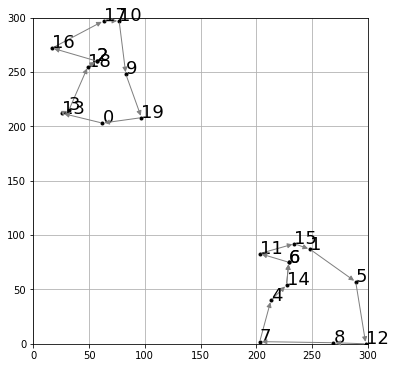

In [19]:
d = 0
plt.subplots(figsize=(6, 6))
plt.xlim(0, RANGE)
plt.ylim(0, RANGE)
plt.grid(True)
px, py, pn = [], [], []

num = len(best_ind)
ind = [best_ind[:int(num/2)],best_ind[int(num/2):]]
j = 0
for j in range(2):
    for i in range(int(num/2)+1):
        n1 = ind[j][i-2]
        n2 = ind[j][i-1]
        print("%s, %s, %s" % (n1, list(cities)[n1][0], list(cities)[n1][1]))
        px += [list(cities)[n1][0]]
        py += [list(cities)[n1][1]]
        pn += [n1]
        plt.annotate(n1, xy=(list(cities)[n1][0], list(cities)[n1][1]),fontsize=18)
        plt.annotate('', xy=(list(cities)[n1][0], list(cities)[n1][1]),xytext=(list(cities)[n2][0], list(cities)[n2][1]),
                     arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3',facecolor='gray', edgecolor='gray'))
    
plt.plot(px, py, marker="o", color='k', markersize=3,linestyle='None')
plt.show()
